<a href="https://colab.research.google.com/github/r-bickley/sample-code/blob/master/Copy_of_PHYS_555_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database and Machine Learning Basics

**PHYS-555 Winter 2020 - Assignment #5**


Copy this notebook, edit and format it as you wish, as long as we can understand you answered the questions!

## Knowledge Part (50%)

You can answer the questions with a notebook cell below each question.


1. You are about to run simulations on an HPC cluster which will produce one million outputs. Each output contains:
  - a description of the output: date of simulation, number of parameters M, and the value for each parameters (the metadata)
  - an array of 100,000 elements representaing the generated synthetic data set for this set of parameters.

  Describe briefly how you would store your outputs in such a way you could explore, search and share the results efficiently.

<font color='green'>I would want to store the results of the simulation in an SQL-enabled RDBMS, so that I could easily and quickly query the database and explore the many outputs, parameters and the relationships between them.</font>

2. Give a situation where you would you use a NoSQL database document 
store rather than a traditional single relational (SQL) database.


<font color='green'>Rhetorically, NoSQL databases are very scalable and allow for embarrassingly parallel use. They are less consistent than other kinds of databases, however. One specific example where this might be useful would be in a single key-value database, such as a data set consisting of individual phone numbers corresponding to a name.</font>

3. What is the main issue you have to tackle in a distributed database? Explain briefly the difference between a CA and a CP database and when you could choose one vs the other.

<font color='green'>In a distributed database, the Brewer's theorem means that you can't achieve equally strong consistency, availability, and partition tolerance. Various real effects of network reliability, latency, bandwidth, network inhomogeneities and security, cost, topology, and administration can serve to weaken one of these three aspects while bolstering others. A CA database, which might use NewSQL, could be employed for a moderately sized astronomical database for a legacy survey, such that future scale wouldn't be a concern. A CP database, which might use NoSQL, might contain a simpler dataset, like the names and phone numbers mentioned above, with more data becoming available all the time. </font>

4. You are collecting data from geographically distributed sensors in the ocean. You want to keep GPS coordinates, depth for each sensor, and the pressure, temperature every day. Describe a simple relational data model to store the data (i.e. what are the tables you are creating), so that you can query your data with SQL.

<font color='green'>I would have tables for each sensor, with columns corresponding to GPS position, depth, pressure, and temperature, and rows corresponding to days. Keeping a table for each sensor would make them parallelizable if I wanted to compare the readings from the sensors.</font>

5. Where is the query executed when:
  - a) you are querying from a python script running on your laptop a table kept in 
Google BigQuery
  - b) you are querying a pandas dataframe from a jupyter session launched from your laptop
  - c) you are querying a BigQuery table in a Google Colab session accessed from your laptop browser
  - d) you have launched a job from the Compute Canada graham cluster which will query tables in a PostgresQL database on the cedar cluster.

<font color='green'>a. The query is executed in a data warehouse. b. The query is executed on my computer. c. Executed on Google Cloud servers. d. Executed at the cedar cluster.</font>

6. Why do we use three sets (training, validation and test sets) in machine learning training procedures? In other words, what are the differences between validation and test sets? 

<font color='green'>In many machine learning models, the training and test sets are shuffled over multiple epochs of learning, such that by the end of training, a network might have seen every image in the training and test set. The validation set, therefore, is reserved for a final test on data that the network has never seen before, after all training epochs are complete.</font>





7. What are the relationship between maximum likelihood estimation of a linear model and linear model regression used in machine learning software such as scikit-learn?

<font color='green'>These are effectively the same, perhaps with minor nuances in implementation. Scikit learn includes model types that are quite simple, in addition to ones that are more advanced.</font>

8. Why do we normalize (or scale) our data before the training step? Explore the [scikit-learn documentation](https://scikit-learn.org) and find some normalization functions. Should we normalize a data  set for the PCA method? Name a method (or methods) that does not need a normalization step for the training procedure.     

<font color='green'>Normalizing data before training is important, because for simple numerical reasons, training parameters that have larger values and / or larger variances in values will be weighted more importantly as a result. Normalizing / scaling eliminates this factor, and places all parameters on equal footing before training begins.</font>

9. Explain very briefly the overfitting problem in machine learning. Give at least one solution to mitigate overfitting. From a Bayesian perspective, how would the Bayes rule relate to overfitting mitigation?


<font color='green'>In Machine Learning, overfitting occurs when a model becomes extremely good at classifying training (and possibly test) set data, to the detriment of its performance on real and / or validation data. A polynomial fit to points is a simple example, while an extremely high order polynomial will often fit the "training set" to extremely high accuracy, it will usually perform poorly on real data. Overfitting can be mitigated using methods like Cross-Validation. In a traditional 70-30 split, cross-validation trains and tests on a different 70-30 in every epoch, increasing the robustness of the network to overfitting. From a bayesian perspective, each training epoch in cross-validation acts as a prior to the subsequent epoch, and so cross-validation is often considered to be a Bayesian approach to machine learning. </font>

10. Explain how to obtain a cumulative explained variance plot (see the PCA lecture). Explain how PCA can be used to reduce noise in images (image denoising).

<font color='green'>For a cumulative explained variance plot, you first need the variance of each data component, as well as the total sum of the variances of the components. From there, you make a plot showing how much of the total variance is contained in the first n componenets of N total components. PCA can be used to reduce noise in images because the total the energy of an image signal will concentrate on a subset of the PCA-transformed dataset, while the energy of noise will evenly spread over the whole image. Thus, by transforming data to PCA, the true image and the noise will separate, such that the noise can be partially removed.</font>

## Practice Part (50%)

The point of this exercise will be to:
- retrieve data from BigQuery with selection on the fly
- practice your SQL ninja skills
- understand data preparation
- try kNN and linear models for regression


You may want to practice with BigQuery [quick tutorial](https://colab.research.google.com/notebooks/bigquery.ipynb) if you did not get a chance to do so with the quick tutorial.

* first login to Google, and go to the Google Compute Engine [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
* then authenticate the colab notebook to allow access to BigQuery just like in the tutorial linked above.

Try to make a project and a dataset. You should have access to the dataset `assign5` associated with the `phys-555-2020` project. You should be able to query both:
- the target labels table ID: `phys-555-2020.assign5.targets`
- the input features table ID: `phys-555-2020.assign5.inputs`

For questions 1-3, expect to spend time reading SQL / BigQuery documentation. For questions 4-7, expect scikit-learn reading. 

1. Explore either with python script or using the BigQuery [console](https://console.cloud.google.com/bigquery) interface the target and labels datasets. How many fields in each of the table? How many NaN does the input table have? Write your SQL queries or your python code.

In [1]:
# your input
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
from google.cloud import bigquery
bq = bigquery.Client(project="lab-proj-feb4")

query1 = """
#standardSQL

SELECT *
FROM `phys-555-2020.assign5.targets`
"""
targets = bq.query(query1).to_dataframe()
targets.describe()

,ID,tar_1,tar_2,tar_3,Tar_4,tar_5,tar_6,tar_7,tar_8,tar_9,tar_10,tar_11,tar_12
count,1.588880e+05,75852.000000,158852.000000,92991.000000,94951.000000,97650.000000,59447.000000,60146.000000,97634.000000,96436.000000,60306.000000,95643.000000,97047.000000
mean,5.878134e+17,8.874875,7.707753,8.546300,8.646865,8.643520,8.897636,8.913096,8.481032,8.435853,8.778424,8.704164,8.583535
std,1.786976e+14,0.169721,11.217666,0.241618,0.100803,0.106223,0.168795,0.145322,0.081249,0.091661,0.147618,0.192348,0.140925
min,5.877230e+17,8.107170,-99.900000,7.762050,7.962620,7.735390,8.352340,8.194490,8.006760,8.169230,7.841900,8.090010,7.832590
25%,5.877321e+17,8.778530,8.744627,8.379140,8.593565,8.587332,8.779070,8.824822,8.443160,8.376800,8.690720,8.575615,8.494685
50%,5.877391e+17,8.900750,8.941810,8.572460,8.665100,8.666935,8.916170,8.937985,8.501310,8.451170,8.788680,8.729530,8.605980
75%,5.877428e+17,8.996460,9.049900,8.734620,8.715075,8.722340,9.030810,9.025100,8.536767,8.507143,8.883090,8.849650,8.684920
max,5.888489e+17,9.292740,9.466640,9.049880,8.849830,8.843860,9.278110,9.178320,8.642970,8.673620,9.084390,9.278100,8.865720


In [3]:
query2 = """
#standardSQL

SELECT *
FROM `phys-555-2020.assign5.inputs`
"""
inputs = bq.query(query2).to_dataframe()
inputs.describe()

,ID,inp_1,inp_2,inp_3,inp_4,inp_5,inp_6,inp_7,inp_8,inp_9,inp_10,inp_11,inp_12,inp_13,inp_14,inp_15,inp_16,inp_17,inp_18,inp_19,inp_20,inp_21
count,1.588880e+05,158888.000000,1.588520e+05,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,158888.000000,1.588880e+05,1.588880e+05,158888.000000,158888.000000,1.588880e+05,1.588880e+05
mean,5.878134e+17,0.073355,-7.181648e+02,9.171321,12.139138,0.242076,787.709671,276.834109,304.488441,328.113210,192.831965,256.926292,128.464586,92.944778,4.542461,2.794070,6.253987e+07,5.825045e+07,2.950914,2.620114,1.518761e+07,1.046368e+07
std,1.786976e+14,0.040598,2.866117e+05,7.391414,2207.320305,0.106006,1132.231341,398.157926,1019.829038,954.068215,587.868510,396.118383,149.539867,115.554999,3.777800,1.307917,4.112202e+09,5.898398e+09,2.918572,1.336551,5.135635e+09,2.951444e+09
min,5.877230e+17,-0.005710,-1.142240e+08,3.000010,0.008550,0.006079,23.162400,9.112960,0.000000,0.000000,5.489330,3.159210,0.000000,0.000000,0.742480,0.804927,-1.404940e+00,-1.404940e+00,0.783565,0.483554,-9.252140e-01,-9.252140e-01
25%,5.877321e+17,0.043387,9.511537e+00,4.265175,0.150342,0.163065,260.327000,91.462075,87.951475,106.427000,44.725050,67.271175,51.258475,35.455700,2.739100,2.096597,3.481180e+00,3.557663e+00,2.061777,1.743465,1.820320e+00,1.708257e+00
50%,5.877391e+17,0.067989,9.986150e+00,6.399195,0.218978,0.231611,495.383000,174.041000,176.641000,206.994500,79.354150,149.102500,88.050850,62.146300,3.735035,2.534020,4.449620e+00,4.536750e+00,2.463550,2.337480,2.289185e+00,2.155230e+00
75%,5.877428e+17,0.095168,1.038143e+01,11.226850,0.305042,0.311631,921.160000,323.647000,343.198750,388.732500,158.784250,300.487500,152.721000,109.349250,5.203260,3.125953,5.738235e+00,5.867250e+00,3.050393,3.144745,2.931513e+00,2.776445e+00
max,5.888489e+17,1.741510,1.287000e+01,71.798000,658082.000000,1.888690,172126.000000,60645.800000,322648.000000,335411.000000,76271.900000,16698.200000,9822.040000,7295.180000,588.006000,162.843000,6.900000e+11,1.650000e+12,298.396000,46.508000,2.020000e+12,1.140000e+12


In [4]:
print(inputs.isna().sum())
print('The Inputs table has the above number of NaNs.')

ID         0
inp_1      0
inp_2     36
inp_3      0
inp_4      0
inp_5      0
inp_6      0
inp_7      0
inp_8      0
inp_9      0
inp_10     0
inp_11     0
inp_12     0
inp_13     0
inp_14     0
inp_15     0
inp_16     0
inp_17     0
inp_18     0
inp_19     0
inp_20     0
inp_21     0
dtype: int64
The Inputs table has the above number of NaNs.


2. Write code using a single SQL query that will return a dataframe with the ID of the sample, 3 associated input features and one target label.

In [5]:
query3 = '''
SELECT `phys-555-2020.assign5.inputs`.inp_1, `phys-555-2020.assign5.inputs`.inp_2, `phys-555-2020.assign5.inputs`.inp_3, `phys-555-2020.assign5.targets`.tar_1
FROM `phys-555-2020.assign5.inputs`
INNER JOIN `phys-555-2020.assign5.targets` ON `phys-555-2020.assign5.targets`.ID=`phys-555-2020.assign5.inputs`.ID;
'''
features_1 = bq.query(query3).to_dataframe()
features_1.describe()

,inp_1,inp_2,inp_3,tar_1
count,158888.000000,1.588520e+05,158888.000000,75852.000000
mean,0.073355,-7.181648e+02,9.171321,8.874875
std,0.040598,2.866117e+05,7.391414,0.169721
min,-0.005710,-1.142240e+08,3.000010,8.107170
25%,0.043387,9.511537e+00,4.265175,8.778530
50%,0.067989,9.986150e+00,6.399195,8.900750
75%,0.095168,1.038143e+01,11.226850,8.996460
max,1.741510,1.287000e+01,71.798000,9.292740


3. Create a pandas dataframe with all the input features, and a few target labels, cleaned and scaled. For all the question below, make sure the associated inputs and targets are clean, i.e., have no NaN, and are appropriately scaled. Bonus marks if you clean the data using SQL queries only.

In [6]:
query4 = '''
SELECT `phys-555-2020.assign5.inputs`.*,`phys-555-2020.assign5.targets`.tar_1,`phys-555-2020.assign5.targets`.tar_2,`phys-555-2020.assign5.targets`.tar_3
FROM `phys-555-2020.assign5.inputs`
INNER JOIN `phys-555-2020.assign5.targets` ON `phys-555-2020.assign5.targets`.ID=`phys-555-2020.assign5.inputs`.ID
WHERE `phys-555-2020.assign5.inputs`.inp_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_1 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_3 IS NOT NULL;
'''
features_2 = bq.query(query4).to_dataframe()
features_2.describe()

,ID,inp_1,inp_2,inp_3,inp_4,inp_5,inp_6,inp_7,inp_8,inp_9,inp_10,inp_11,inp_12,inp_13,inp_14,inp_15,inp_16,inp_17,inp_18,inp_19,inp_20,inp_21,tar_1,tar_2,tar_3
count,7.327500e+04,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,7.327500e+04,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000,73275.000000
mean,5.878147e+17,0.072156,9.662698,13.308673,1.443905,0.272084,1006.646632,353.687643,454.782347,494.467073,259.970573,316.320222,168.595342,122.385820,5.294033,3.025666,2.428090e+06,5.738714,3.181759,2.742147,2.608061,2.409458,8.873321,8.239776,8.541435
std,1.804146e+14,0.035030,1.451555,7.924043,239.500690,0.106432,1354.440872,476.330206,1361.484043,1352.272644,572.485470,467.035974,174.090260,134.775446,4.154521,1.260086,3.734163e+08,2.938878,2.235377,1.432020,1.068306,0.978498,0.170009,8.124227,0.234251
min,5.877230e+17,0.020502,-1.000000,5.000160,0.021038,0.010336,39.864900,14.468900,0.000000,0.000000,8.882720,8.460380,8.875370,6.657270,0.945762,0.827228,-7.811220e-01,1.384060,0.783565,0.571842,0.636072,0.598356,8.107170,-99.900000,7.762120
25%,5.877321e+17,0.045717,9.466225,7.645990,0.180767,0.191021,364.190000,127.936000,169.786000,203.646000,75.143950,84.594100,73.706000,51.431000,3.209430,2.267915,4.034920e+00,4.134740,2.221375,1.815850,1.909255,1.762590,8.776430,8.723075,8.380805
50%,5.877391e+17,0.065864,9.841810,10.771900,0.253980,0.261385,659.197000,231.531000,287.737000,334.885000,129.627000,181.827000,121.572000,86.026700,4.387400,2.750020,5.050840e+00,5.170130,2.673500,2.410120,2.383230,2.200290,8.899350,8.873980,8.567980
75%,5.877429e+17,0.089922,10.198700,16.473650,0.344287,0.344033,1198.410000,420.991500,512.556500,573.996500,249.854000,370.220500,201.893000,145.155500,6.169970,3.421515,6.509705e+00,6.658835,3.379850,3.264225,3.027570,2.797145,8.995400,8.995920,8.722530
max,5.888489e+17,0.384089,12.379000,71.798000,59025.500000,0.983377,172126.000000,60645.800000,322648.000000,335411.000000,76271.900000,16698.200000,9822.040000,7295.180000,588.006000,39.555200,9.248510e+10,419.793000,97.189000,35.389200,30.875600,18.497500,9.292740,9.300140,9.049470


In [36]:
query5 = '''
SELECT `phys-555-2020.assign5.inputs`.*,`phys-555-2020.assign5.targets`.tar_2
FROM `phys-555-2020.assign5.inputs`
INNER JOIN `phys-555-2020.assign5.targets` ON `phys-555-2020.assign5.targets`.ID=`phys-555-2020.assign5.inputs`.ID
WHERE `phys-555-2020.assign5.inputs`.inp_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_2 != -99.9;
'''
features_3 = bq.query(query5).to_dataframe()
features_3.describe()

,ID,inp_1,inp_2,inp_3,inp_4,inp_5,inp_6,inp_7,inp_8,inp_9,inp_10,inp_11,inp_12,inp_13,inp_14,inp_15,inp_16,inp_17,inp_18,inp_19,inp_20,inp_21,tar_2
count,1.571450e+05,157145.000000,1.571450e+05,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,1.571450e+05,1.571450e+05,157145.000000,157145.000000,1.571450e+05,1.571450e+05,157145.000000
mean,5.878133e+17,0.073121,-7.260794e+02,9.195628,12.270901,0.241727,783.515940,275.357795,302.096398,325.765867,192.716444,253.674020,127.790699,92.365251,4.537400,2.791830,6.255255e+07,5.883658e+07,2.950309,2.608706,1.535605e+07,1.057974e+07,8.876651
std,1.785474e+14,0.040064,2.881642e+05,7.401432,2219.527699,0.105964,1121.335538,394.320139,1020.014715,953.711359,589.944993,385.524003,147.551033,113.660214,3.780184,1.308252,4.126130e+09,5.930971e+09,2.931249,1.324220,5.164038e+09,2.967767e+09,0.231003
min,5.877230e+17,-0.005710,-1.142240e+08,3.000010,0.008550,0.006079,23.162400,9.112960,0.000000,0.000000,5.489330,3.159210,0.000000,0.000000,0.742480,0.804927,-1.404940e+00,-1.404940e+00,0.783565,0.483554,-9.252140e-01,-9.252140e-01,7.670000
25%,5.877321e+17,0.043232,9.505700e+00,4.274780,0.150065,0.162705,259.470000,91.180900,87.658500,106.161000,44.571100,66.718100,51.142400,35.362400,2.735290,2.095110,3.479600e+00,3.557000e+00,2.059690,1.738900,1.817080e+00,1.704820e+00,8.756400
50%,5.877391e+17,0.067805,9.978670e+00,6.423880,0.218635,0.231185,493.814000,173.472000,176.024000,206.240000,79.056500,147.922000,87.786000,61.897900,3.729600,2.531460,4.448460e+00,4.536180e+00,2.460640,2.328110,2.283830e+00,2.148720e+00,8.944440
75%,5.877428e+17,0.094872,1.037320e+01,11.274200,0.304621,0.311229,918.075000,322.553000,341.441000,387.224000,158.286000,297.779000,152.195000,108.891000,5.197240,3.123140,5.736180e+00,5.866400e+00,3.046210,3.131470,2.921790e+00,2.765480e+00,9.050050
max,5.888489e+17,1.061310,1.287000e+01,71.798000,658082.000000,1.888690,172126.000000,60645.800000,322648.000000,335411.000000,76271.900000,16698.200000,9822.040000,7295.180000,588.006000,162.843000,6.900000e+11,1.650000e+12,298.396000,46.508000,2.020000e+12,1.140000e+12,9.466640


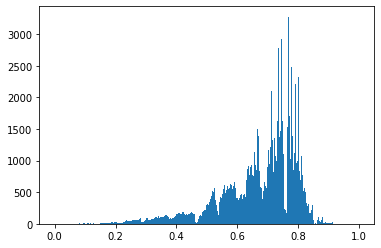

In [52]:
plt.hist(features_3['tar_2'],bins=500)
plt.show()

In [0]:
for column in list(features_3):
  if column == 'ID':
    pass
  else:
    features_3[column] -= min(features_3[column])
    features_3[column] /= max(features_3[column])

,ID,inp_1,inp_2,inp_3,inp_4,inp_5,inp_6,inp_7,inp_8,inp_9,inp_10,inp_11,inp_12,inp_13,inp_14,inp_15,inp_16,inp_17,inp_18,inp_19,inp_20,inp_21,tar_2
count,1.571450e+05,157145.000000,157145.000000,157145.000000,1.571450e+05,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,157145.000000,1.571450e+05,1.571450e+05,157145.000000,157145.000000,1.571450e+05,1.571450e+05,157145.000000
mean,5.878133e+17,0.073880,0.999994,0.090055,1.863347e-05,0.125171,0.004418,0.004391,0.000936,0.000971,0.002455,0.015005,0.013011,0.012661,0.006462,0.012262,9.065588e-05,3.565854e-05,0.007280,0.046174,7.602006e-06,9.280475e-06,0.671615
std,1.785474e+14,0.037548,0.002523,0.107582,3.372722e-03,0.056286,0.006515,0.006503,0.003161,0.002843,0.007735,0.023092,0.015022,0.015580,0.006437,0.008074,5.979899e-03,3.594528e-03,0.009849,0.028772,2.556455e-03,2.603304e-03,0.128575
min,5.877230e+17,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.877321e+17,0.045868,1.000000,0.018529,2.150416e-07,0.083196,0.001373,0.001353,0.000272,0.000317,0.000512,0.003807,0.005207,0.004847,0.003393,0.007962,7.079043e-12,3.007236e-12,0.004288,0.027276,1.357571e-12,2.307047e-12,0.604684
50%,5.877391e+17,0.068897,1.000000,0.049767,3.192383e-07,0.119571,0.002735,0.002711,0.000546,0.000615,0.000965,0.008671,0.008938,0.008485,0.005087,0.010655,8.483188e-12,3.600679e-12,0.005635,0.040078,1.588636e-12,2.696433e-12,0.709346
75%,5.877428e+17,0.094264,1.000000,0.120268,4.498999e-07,0.162089,0.005200,0.005169,0.001058,0.001154,0.002003,0.017647,0.015495,0.014926,0.007586,0.014307,1.034945e-11,4.406873e-12,0.007603,0.057533,1.904457e-12,3.237451e-12,0.768128
max,5.888489e+17,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000


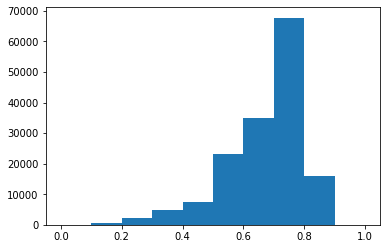

In [40]:
plt.hist(features_3['tar_2'])
features_3.describe()

Now you will use k-NN (for regression) and linear regression model to make predictions on your data set. 

4. Choose a target label (say `tar_2`). Use all feature inputs (`inp_1` to `inp_20`) to predict `tar_2` with linear regression. Examine if you need regularization.

In [0]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
inp_total = features_3.drop(columns=['ID','tar_2','inp_21'])
tar_total = features_3['tar_2']

In [51]:
print(np.shape(inp_total))
print(type(tar_total))
print(np.shape(tar_total))

(157145, 20)
<class 'pandas.core.series.Series'>
(157145,)


In [0]:
inp_train, inp_validate, tar_train, tar_validate = train_test_split(inp_total, tar_total, test_size=0.2, random_state=0)

In [49]:
lrg = LinearRegression()

import time
start = time.time()

lrg.fit(inp_train,tar_train)
print('Done')

score_original = lrg.score(inp_validate,tar_validate)
print ('Score validation', score_original)
print  ('-----------------------------')

end = time.time()
time_taken = end - start
print ('Classification Time: ',time_taken)

Done
Score validation 0.5382349305144641
-----------------------------
Classification Time:  0.1014249324798584


In [70]:
#A score of 0.53 is inadequate. Thus, regularization is necessary. I'll use Ridge.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001)
start = time.time()

ridge.fit(inp_train,tar_train)
print('Done')

score_original = ridge.score(inp_validate,tar_validate)
print ('Score validation', score_original)
print  ('-----------------------------')

end = time.time()
time_taken = end - start
print ('Classification Time: ',time_taken)
print('Regularization does not significantly improve the performance')

Done
Score validation 0.5390271556686312
-----------------------------
Classification Time:  0.04389309883117676
Regularization does not significantly improve the performance


In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
import time
start = time.time()
knn.fit(inp_train,tar_train)
print('Done')

score_original = knn.score(inp_validate,tar_validate)
print ('Score validation', score_original)
print  ('-----------------------------')

end = time.time()
time_taken = end - start
print ('Classification Time: ',time_taken)

Done
Score validation 0.8383091902935881
-----------------------------
Classification Time:  11.152270078659058


5. Find the input (`inp_x`) feature that has no impact (or minimum impact) and the most important one in the prediction.

In [60]:
print(np.argmin(np.abs(lrg.coef_))+1)
print(np.argmax(np.abs(lrg.coef_))+1)
print(lrg.coef_)

20
7
[ 1.01642075e+00 -4.70973429e-01 -1.83071174e-01  2.01653198e-01
  1.26748376e-01 -1.63295481e+02  1.69453363e+02 -1.46118167e+00
 -5.22655596e+00  7.80146140e-01 -3.91666786e-01 -4.13907077e-01
 -9.63997228e-01  1.39448716e+00 -3.16006152e+00 -2.11502655e-01
 -2.10840431e-01 -3.50832476e+00  2.68173286e+00 -9.13087204e-02]


This indicates that inp_20 is the least important to the prediction, and inp_7 is the most important to the prediction.

6. Use all inputs and do a PCA on the input data. Then use the first 3 components to predict `tar_2`. Compare the results with linear regression with regularization.


In [62]:
from sklearn import preprocessing

n_components=3

pca=PCA(n_components=n_components)

pca.fit(inp_train)
inp_tr_pca = pca.transform(inp_train)
inp_va_pca = pca.transform(inp_validate)

scaler_m= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(inp_tr_pca)   # minmax normalization  

inp_tr_pca_N= scaler_m.transform(inp_tr_pca)
inp_va_pca_N= scaler_m.transform(inp_va_pca)

knn = KNeighborsRegressor(n_neighbors=5)
import time
start = time.time()

knn.fit(inp_tr_pca_N, tar_train)

print ('Score train', knn.score(inp_tr_pca_N, tar_train))
score_with_pca= knn.score(inp_va_pca_N,tar_validate)
print ('Score validation', score_with_pca)

end = time.time()
time_taken_pca = end - start
print  ('-----------------------------')
print ('Classification Time : ',time_taken_pca)

Score train 0.7565745721617164
Score validation 0.6345637743265715
-----------------------------
Classification Time :  1.3229172229766846


PCA performs significantly better than linear regression with regularization.

7. Repeat the same procedure for tar_7 and tar_12.

In [72]:
query6 = '''
SELECT `phys-555-2020.assign5.inputs`.*,`phys-555-2020.assign5.targets`.tar_7
FROM `phys-555-2020.assign5.inputs`
INNER JOIN `phys-555-2020.assign5.targets` ON `phys-555-2020.assign5.targets`.ID=`phys-555-2020.assign5.inputs`.ID
WHERE `phys-555-2020.assign5.inputs`.inp_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_7 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_7 != -99.9;
'''
features_4 = bq.query(query6).to_dataframe()
features_4.describe()

for column in list(features_4):
  if column == 'ID':
    pass
  else:
    features_4[column] -= min(features_4[column])
    features_4[column] /= max(features_4[column])

inp_total = features_4.drop(columns=['ID','tar_7','inp_21'])
tar_total = features_4['tar_7']

inp_train, inp_validate, tar_train, tar_validate = train_test_split(inp_total, tar_total, test_size=0.2, random_state=0)

n_components=3

pca=PCA(n_components=n_components)

pca.fit(inp_train)
inp_tr_pca = pca.transform(inp_train)
inp_va_pca = pca.transform(inp_validate)

scaler_m= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(inp_tr_pca)   # minmax normalization  

inp_tr_pca_N= scaler_m.transform(inp_tr_pca)
inp_va_pca_N= scaler_m.transform(inp_va_pca)

knn = KNeighborsRegressor(n_neighbors=5)
start = time.time()
knn.fit(inp_train,tar_train)
print('Done')

score_original = knn.score(inp_validate,tar_validate)
print ('Score validation', score_original)
print  ('-----------------------------')

end = time.time()
time_taken = end - start
print ('Classification Time: ',time_taken)

Done
Score validation 0.7399311716444108
-----------------------------
Classification Time:  2.8686015605926514


In [74]:
features_4.describe()

,ID,inp_1,inp_2,inp_3,inp_4,inp_5,inp_6,inp_7,inp_8,inp_9,inp_10,inp_11,inp_12,inp_13,inp_14,inp_15,inp_16,inp_17,inp_18,inp_19,inp_20,inp_21,tar_7
count,6.014300e+04,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,60143.000000,6.014300e+04,6.014300e+04,60143.000000
mean,5.878154e+17,0.223543,0.765944,0.144231,0.000031,0.276057,0.029582,0.029480,0.025801,0.027522,0.009239,0.019076,0.038980,0.033492,0.039823,0.058654,0.028371,0.068800,0.025741,0.062509,1.716541e-05,2.699531e-05,0.730425
std,1.813106e+14,0.153285,0.103754,0.121292,0.004522,0.110279,0.037178,0.037124,0.033226,0.032006,0.017753,0.029338,0.039540,0.036398,0.033366,0.034008,0.019452,0.040287,0.024649,0.042034,4.078096e-03,4.772040e-03,0.147707
min,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.877322e+17,0.107431,0.752751,0.056976,0.000003,0.192038,0.009938,0.009868,0.009195,0.010677,0.002388,0.004796,0.017204,0.014180,0.020416,0.038283,0.017282,0.042572,0.014932,0.035871,4.923170e-11,1.150018e-11,0.640705
50%,5.877391e+17,0.196599,0.778751,0.108807,0.000004,0.265403,0.018829,0.018742,0.016380,0.018442,0.004459,0.010655,0.028130,0.023559,0.031179,0.051055,0.024399,0.059885,0.019904,0.052707,5.753209e-11,1.339266e-11,0.755720
75%,5.877429e+17,0.297807,0.803389,0.196915,0.000006,0.350928,0.035324,0.035212,0.029853,0.032639,0.009065,0.022129,0.046545,0.039622,0.048042,0.069198,0.034505,0.084375,0.027847,0.076955,6.903920e-11,1.603283e-11,0.844267
max,5.888489e+17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000


In [73]:
query7 = '''
SELECT `phys-555-2020.assign5.inputs`.*,`phys-555-2020.assign5.targets`.tar_12
FROM `phys-555-2020.assign5.inputs`
INNER JOIN `phys-555-2020.assign5.targets` ON `phys-555-2020.assign5.targets`.ID=`phys-555-2020.assign5.inputs`.ID
WHERE `phys-555-2020.assign5.inputs`.inp_2 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_12 IS NOT NULL
AND `phys-555-2020.assign5.targets`.tar_12 != -99.9;
'''
features_5 = bq.query(query7).to_dataframe()
features_5.describe()

for column in list(features_5):
  if column == 'ID':
    pass
  else:
    features_5[column] -= min(features_5[column])
    features_5[column] /= max(features_5[column])

inp_total = features_5.drop(columns=['ID','tar_12','inp_21'])
tar_total = features_5['tar_12']

inp_train, inp_validate, tar_train, tar_validate = train_test_split(inp_total, tar_total, test_size=0.2, random_state=0)

n_components=3

pca=PCA(n_components=n_components)

pca.fit(inp_train)
inp_tr_pca = pca.transform(inp_train)
inp_va_pca = pca.transform(inp_validate)

scaler_m= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(inp_tr_pca)   # minmax normalization  

inp_tr_pca_N= scaler_m.transform(inp_tr_pca)
inp_va_pca_N= scaler_m.transform(inp_va_pca)

knn = KNeighborsRegressor(n_neighbors=5)
start = time.time()
knn.fit(inp_train,tar_train)
print('Done')

score_original = knn.score(inp_validate,tar_validate)
print ('Score validation', score_original)
print  ('-----------------------------')

end = time.time()
time_taken = end - start
print ('Classification Time: ',time_taken)

Done
Score validation 0.840158902424705
-----------------------------
Classification Time:  5.9725730419158936


So, PCA and KNN returns scores of 0.74 and 0.84 for tar_7 and tar_12, respectively.

8. Write code to save your results in a relational database (SQLite or BigQuery).

In [77]:
import pandas as pd
results_df = pd.DataFrame({'experiment':['linreg_tar_2','ridge_tar_2','knn_tar_2','knn_pca_tar_2','knn_pca_tar_7','knn_pca_tar_12'],'score':[0.5382349305144641,0.5390271556686312,0.8383091902935881,0.7565745721617164,0.7399311716444108,0.840158902424705]})
results_df

,experiment,score
0,linreg_tar_2,0.538235
1,ridge_tar_2,0.539027
2,knn_tar_2,0.838309
3,knn_pca_tar_2,0.756575
4,knn_pca_tar_7,0.739931
5,knn_pca_tar_12,0.840159


In [0]:
#Now adding the data table to SQL lite.
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
results_df.to_sql('users',con=engine,if_exists='replace',index_label='id')